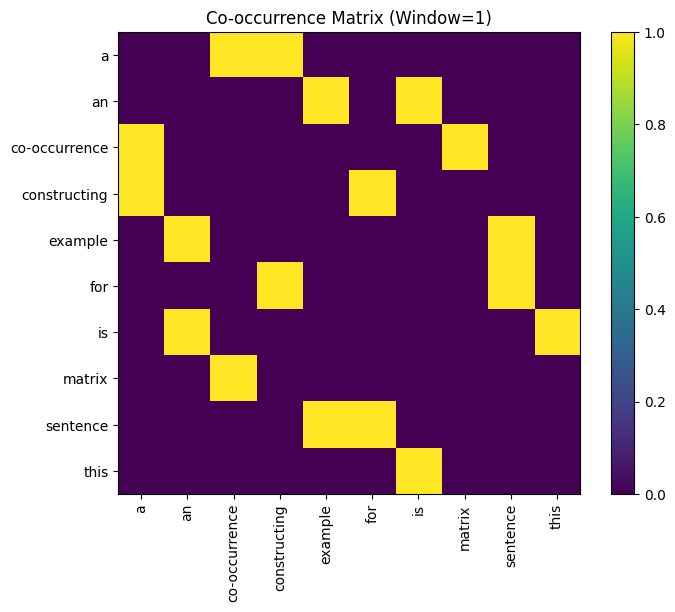

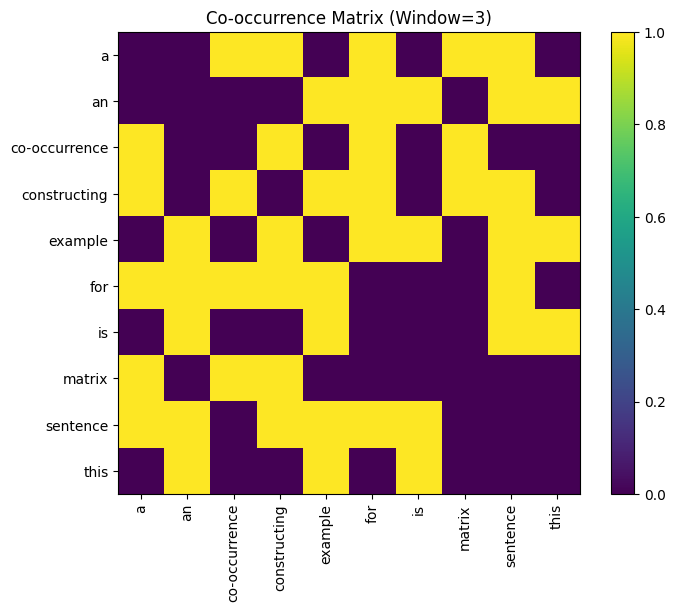

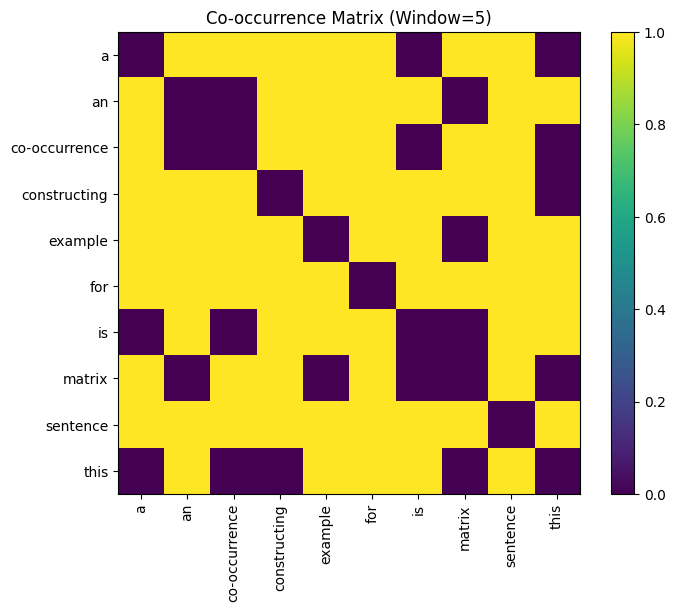

In [1]:
# 示例：加载文本，进行简单预处理（分词、转小写等）
text = "this is an example sentence for constructing a co-occurrence matrix"
words = text.lower().split()
vocab = sorted(set(words))
word2idx = {word: idx for idx, word in enumerate(vocab)}
import numpy as np

def build_co_occurrence_matrix(words, window_size):
    vocab = sorted(set(words))
    word2idx = {word: idx for idx, word in enumerate(vocab)}
    size = len(vocab)
    matrix = np.zeros((size, size))

    # 遍历每个中心词
    for i, word in enumerate(words):
        # 窗口范围：左边和右边各 window_size 个单词
        start = max(i - window_size, 0)
        end = min(i + window_size + 1, len(words))
        for j in range(start, end):
            if i != j:
                # 这里可以直接加1，也可以根据距离加权（问题2会进一步修改）
                matrix[word2idx[word], word2idx[words[j]]] += 1
    return matrix, vocab

# 分别构建不同窗口大小下的共现矩阵
matrix_w1, vocab = build_co_occurrence_matrix(words, window_size=1)
matrix_w3, _ = build_co_occurrence_matrix(words, window_size=3)
matrix_w5, _ = build_co_occurrence_matrix(words, window_size=5)
import matplotlib.pyplot as plt
import seaborn as sns  # 如需使用，可调用sns.heatmap，但也可以只用matplotlib

def plot_matrix(matrix, vocab, title):
    plt.figure(figsize=(8,6))
    plt.imshow(matrix, interpolation='nearest', cmap='viridis')
    plt.title(title)
    plt.colorbar()
    plt.xticks(range(len(vocab)), vocab, rotation=90)
    plt.yticks(range(len(vocab)), vocab)
    plt.show()

plot_matrix(matrix_w1, vocab, "Co-occurrence Matrix (Window=1)")
plot_matrix(matrix_w3, vocab, "Co-occurrence Matrix (Window=3)")
plot_matrix(matrix_w5, vocab, "Co-occurrence Matrix (Window=5)")
